In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Для тепловых карт
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from MLP_lib import MLP, sig_f, visualize_weights_with_biases, Metrics, roc_curve_manual

plt.rcParams["figure.figsize"] = (20,6)
rng = np.random.default_rng(51)

# Задача для лабораторной 1

По условиям лабораторной 1 надо классифицировать датасет с грибами, который состоит из картегориальных признаков. Поэтому, для начала, посмотрим на сам датасет. Вполне может статься, что нам нужны не все признаки.

Теперь посмотрим на работу с категориальными признаками. Для этого загрузим датасет UCI Machine Learning Repository: Mushroom Data Set(https://archive.ics.uci.edu/ml/datasets/Mushroom). Здесь стоит задача бинарной классификации грибов Агариковые (к ним принадлежит Шампиньон) и Лепиота на два класса: съедобные (edible) и ядовитые (poisonous). Датасет состоит из 8416 строк для двух классов (съедобные - 53,3% и ядовитые - 46,7%). В наличии 22 категориальных признака:
1. форма шляпки (cap-shape): bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. поверхность шляпки (cap-surface): fibrous=f,grooves=g,scaly=y,smooth=s
3. цвет шляпки (cap-color): brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. повреждения (bruises?): bruises=t,no=f
5. запах (odor): almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. соединение пластинки (gill-attachment): attached=a,descending=d,free=f,notched=n
7. пространство между пластинками (gill-spacing): close=c,crowded=w,distant=d
8. размер пластинки (gill-size): broad=b,narrow=n
9. цвет пластинок (gill-color): black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. форма ножки (stalk-shape): enlarging=e,tapering=t
11. корень ножки (stalk-root): bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. поверхность ножки над кольцом (stalk-surface-above-ring): fibrous=f,scaly=y,silky=k,smooth=s
13. поверхность ножки под кольцом (stalk-surface-below-ring): fibrous=f,scaly=y,silky=k,smooth=s
14. цвет ножки над кольцом (stalk-color-above-ring): brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. цвет ножки под кольцом (stalk-color-below-ring): brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. тип покрывала (veil-type): partial=p,universal=u
17. цвет покрывала (veil-color): brown=n,orange=o,white=w,yellow=y
18. количество колец (ring-number): none=n,one=o,two=t
19. тип кольца (ring-type): cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. цвет спорового порошка (spore-print-color): black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. популяция (population): abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. среда обитания (habitat): grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [2]:
dfm=pd.read_csv('Mushroom_dataset.csv', delimiter = ",", names=['class-label','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])
dfm

,class-label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BROWN,CLUSTERED,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8414,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES


# Описательная статистика

Посмотрим на соотношение классов в наборе данных, чтобы оценить сбалансированность выборки

In [3]:
dfm['class-label'].value_counts()

EDIBLE       4488
POISONOUS    3928
Name: class-label, dtype: int64

На сей раз в описательной статистике есть почти все что надо: количество (count), мощность (unique), мода (top) и частота моды (freq). Не хватает только процента пропущенных значений.

In [4]:
dfm.describe()

,class-label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,...,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,EDIBLE,CONVEX,SCALY,BROWN,NO,NONE,FREE,CLOSE,BROAD,BUFF,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,WHITE,SEVERAL,WOODS
freq,4488,3796,3268,2320,5040,3808,8200,6824,5880,1728,...,5076,4744,4640,8416,8216,7768,3968,2424,4064,3160


# Распределения

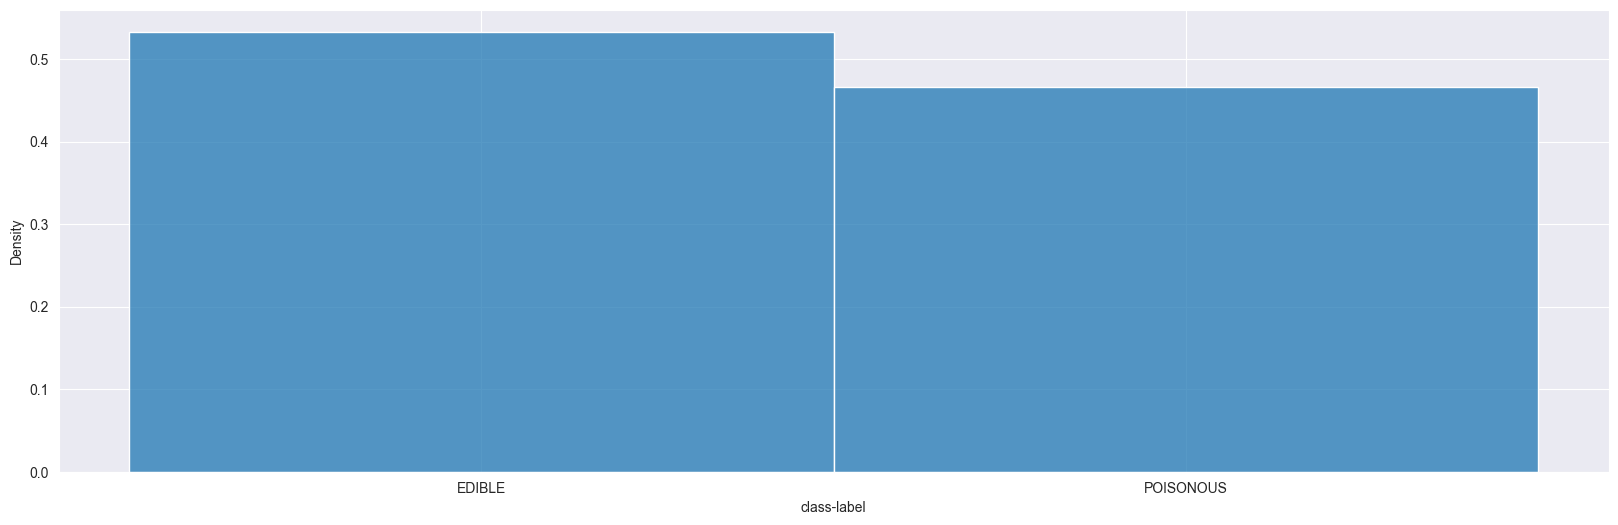

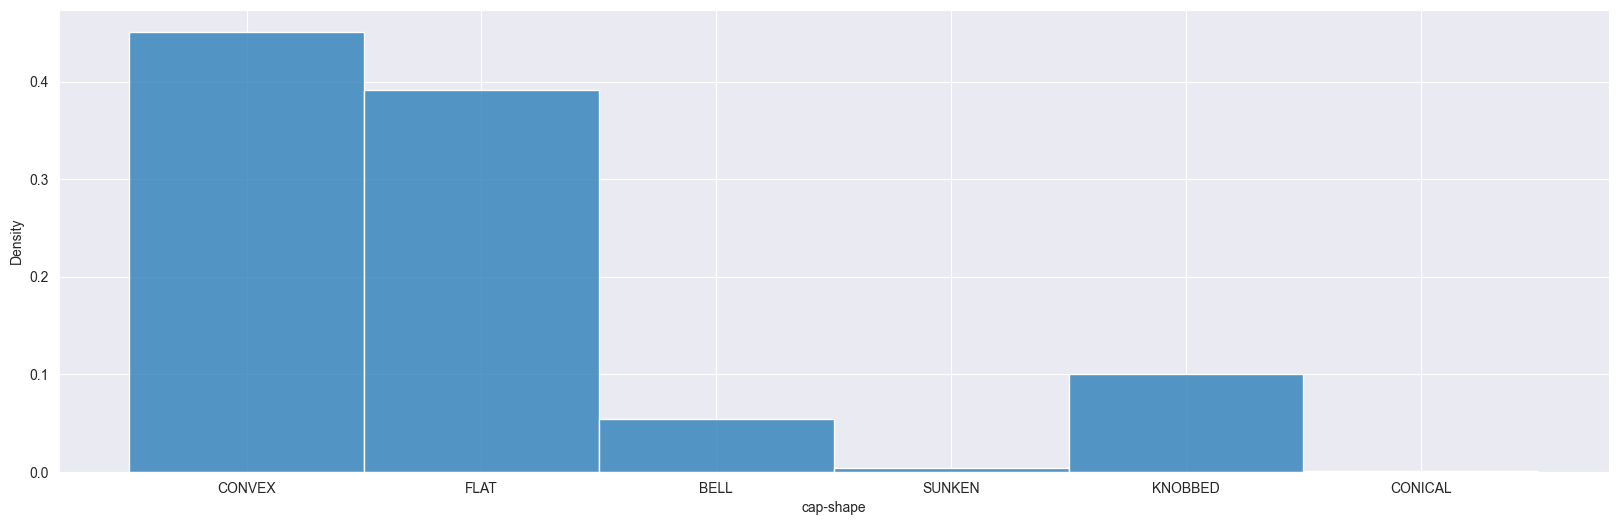

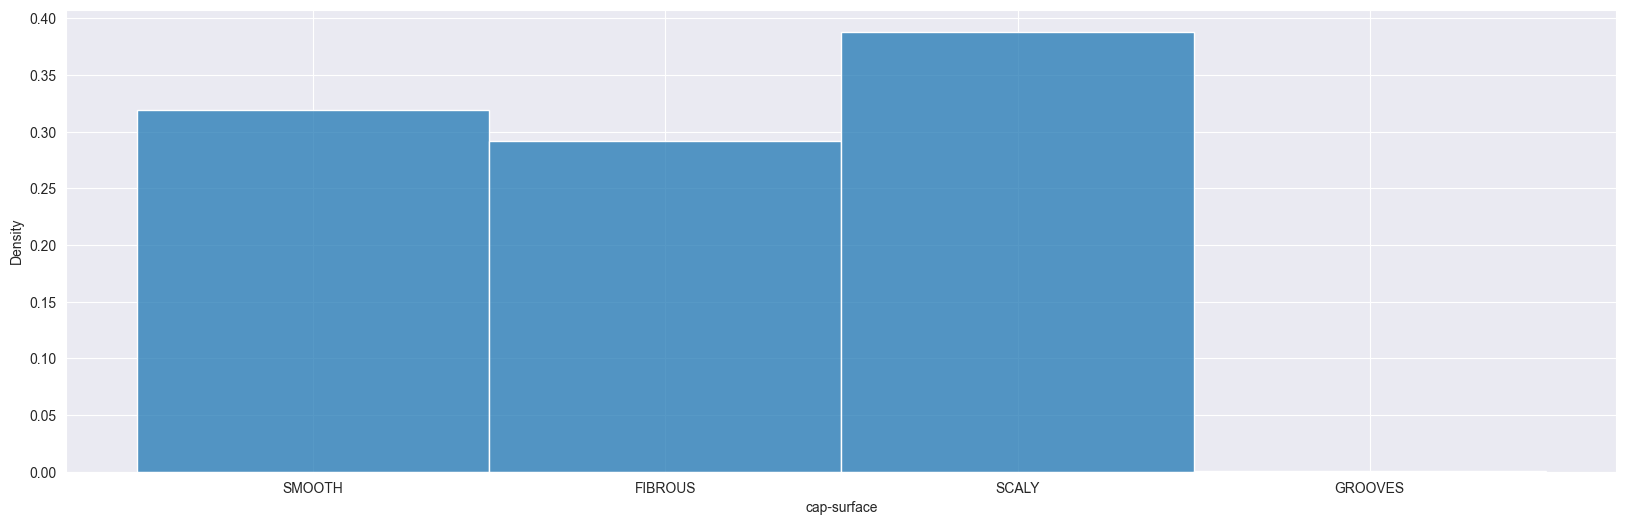

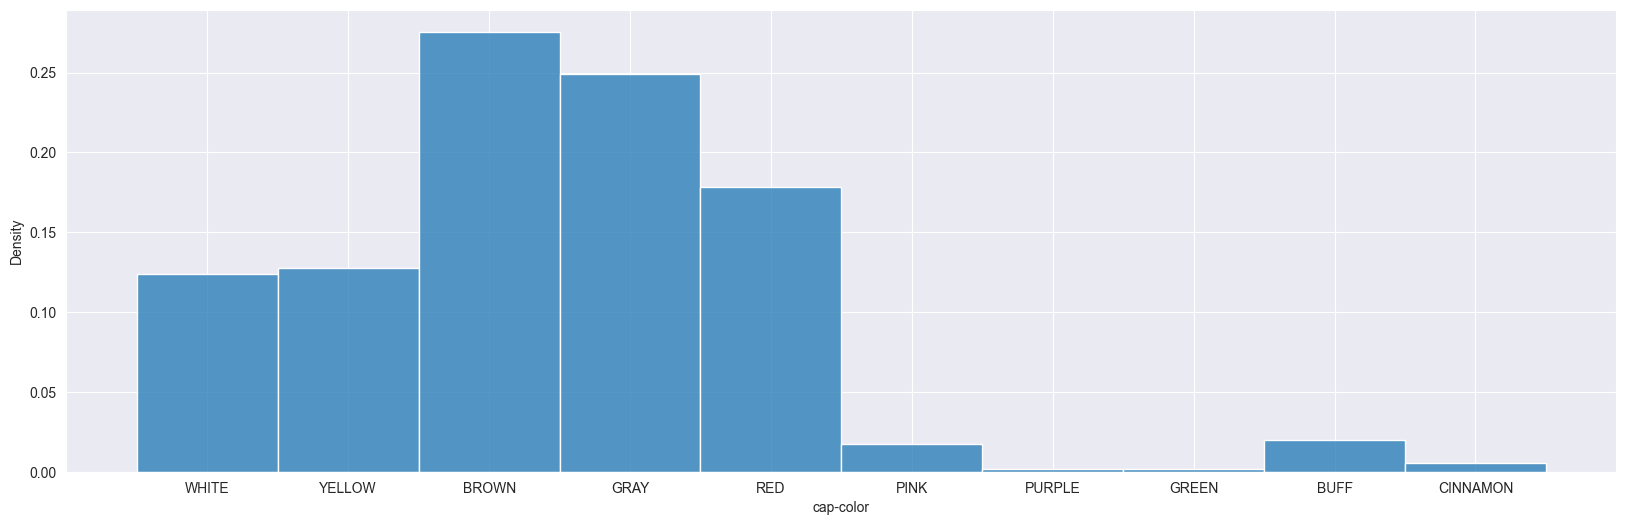

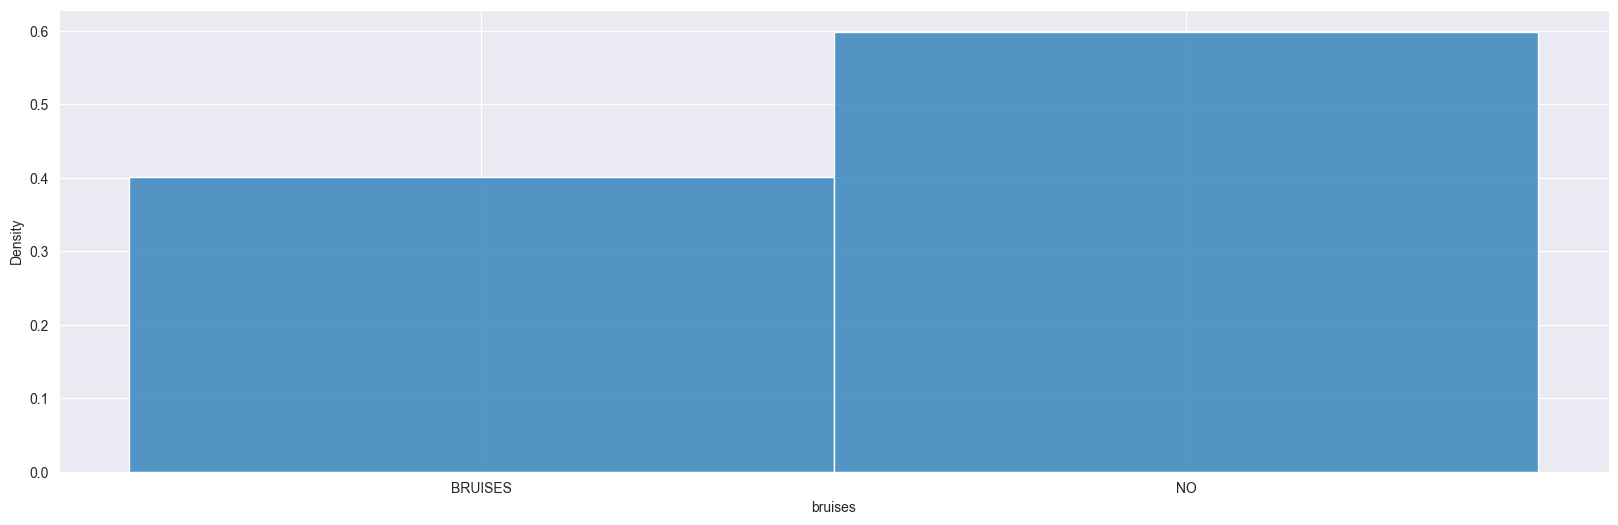

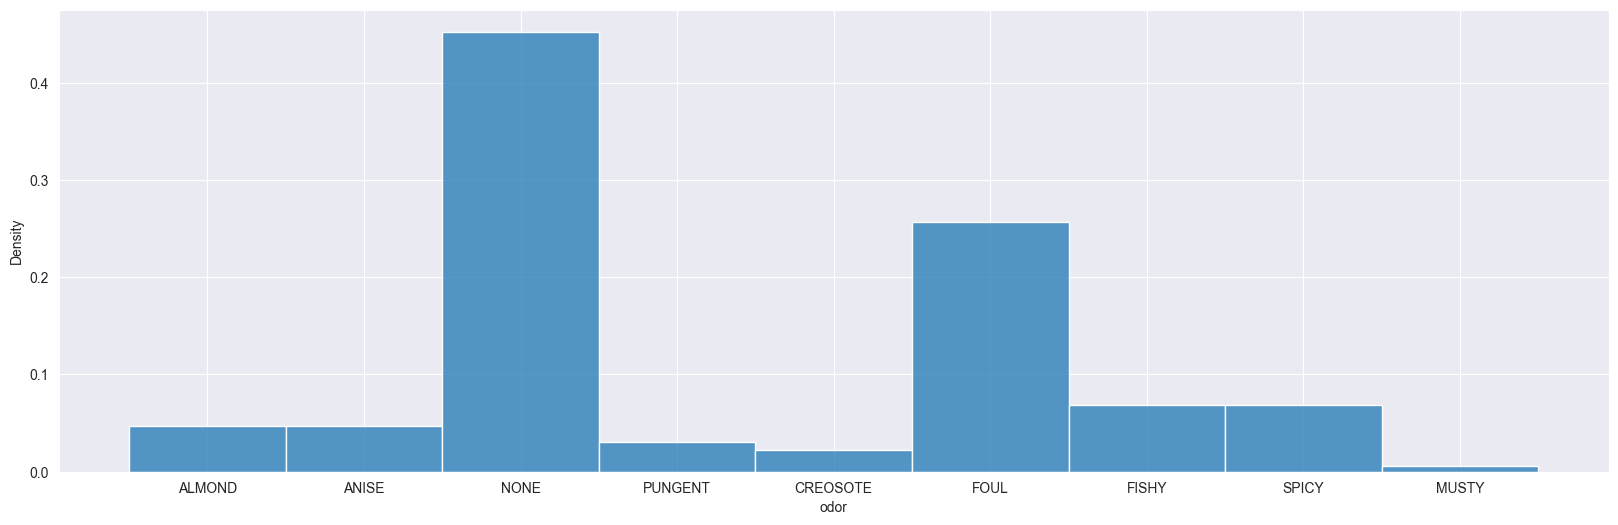

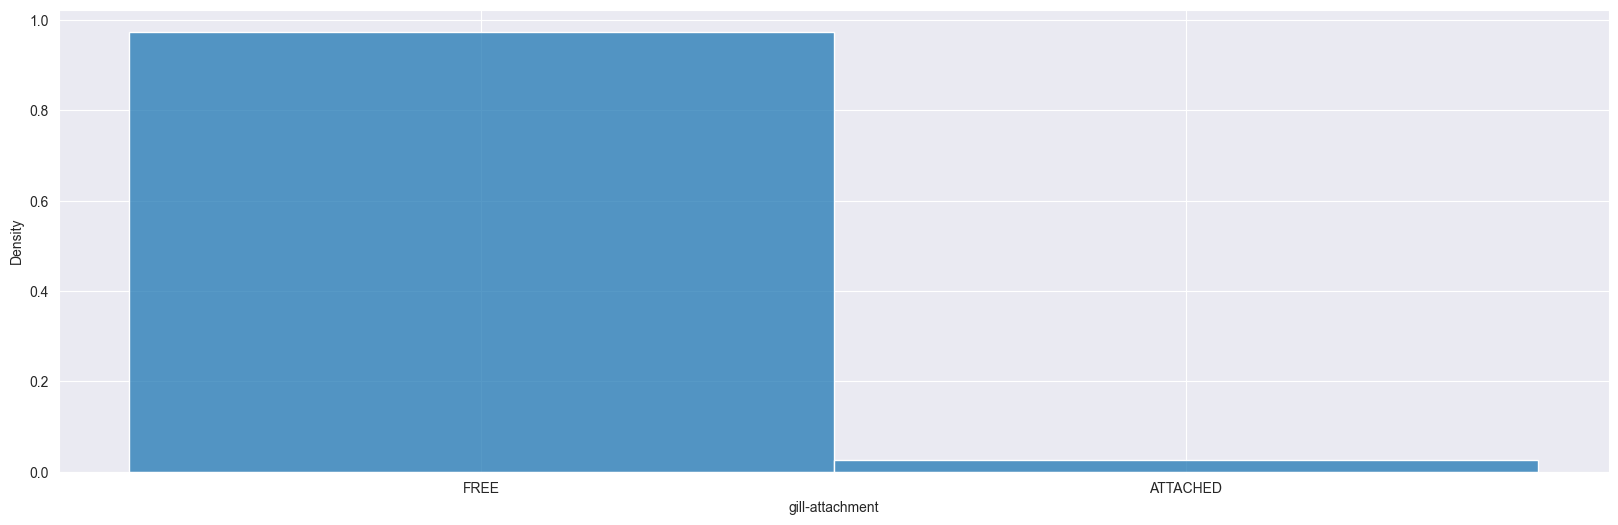

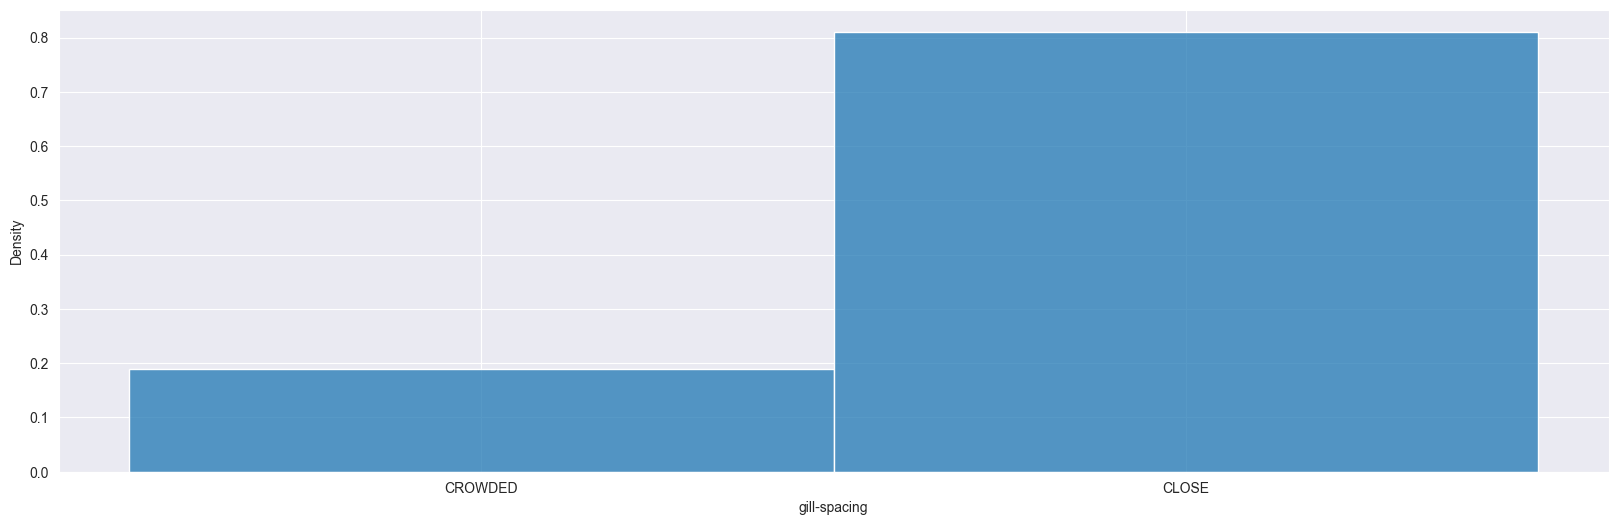

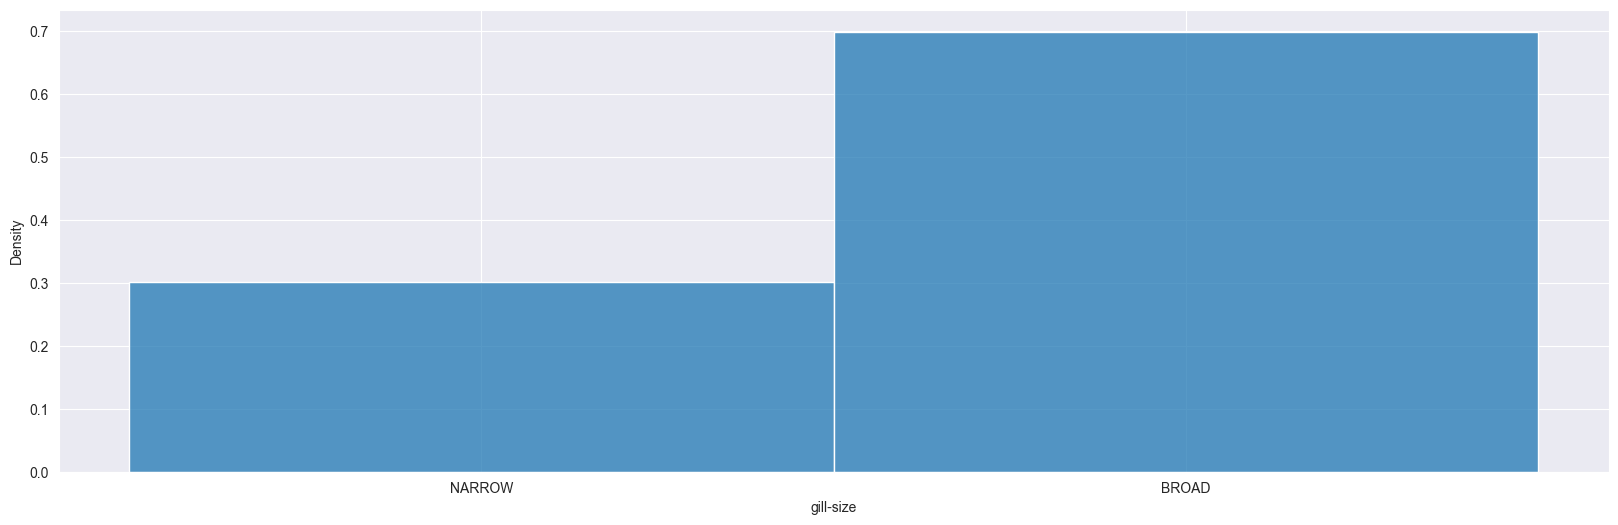

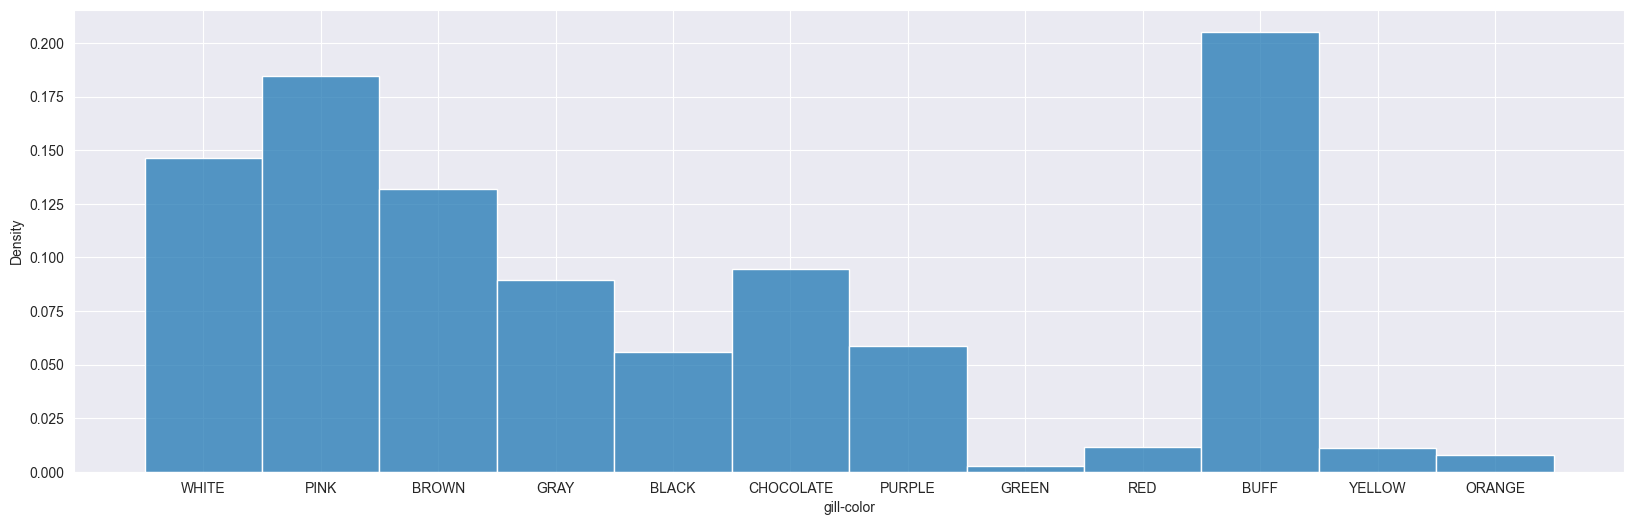

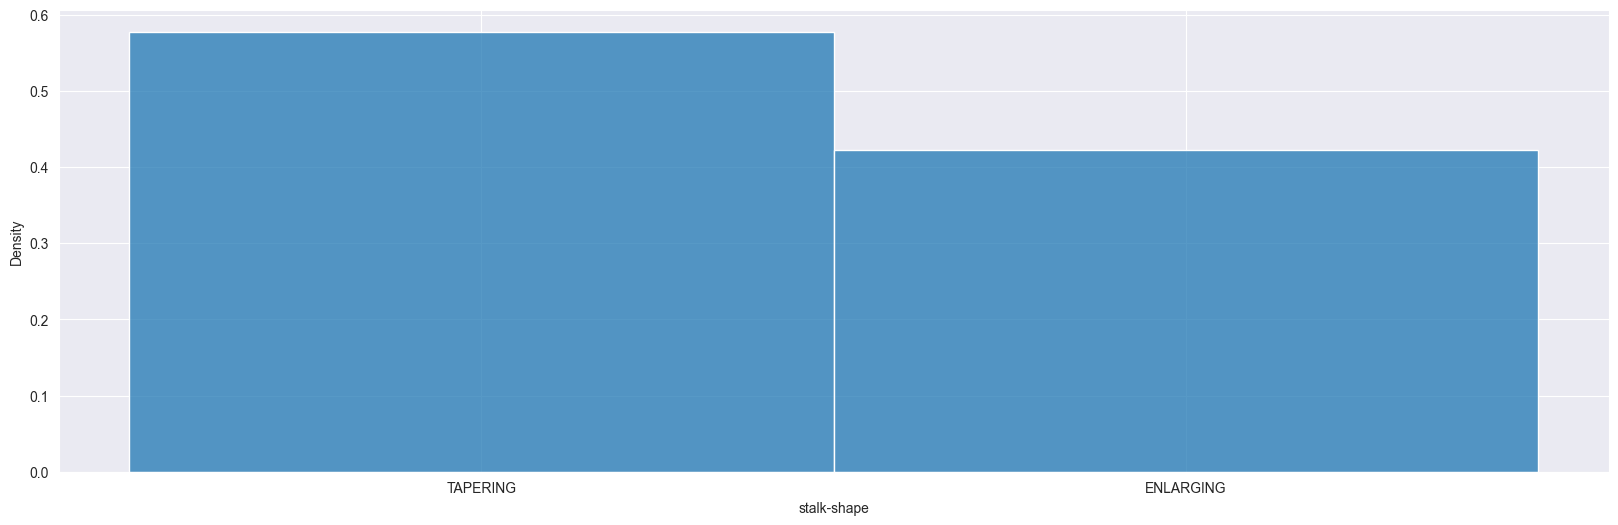

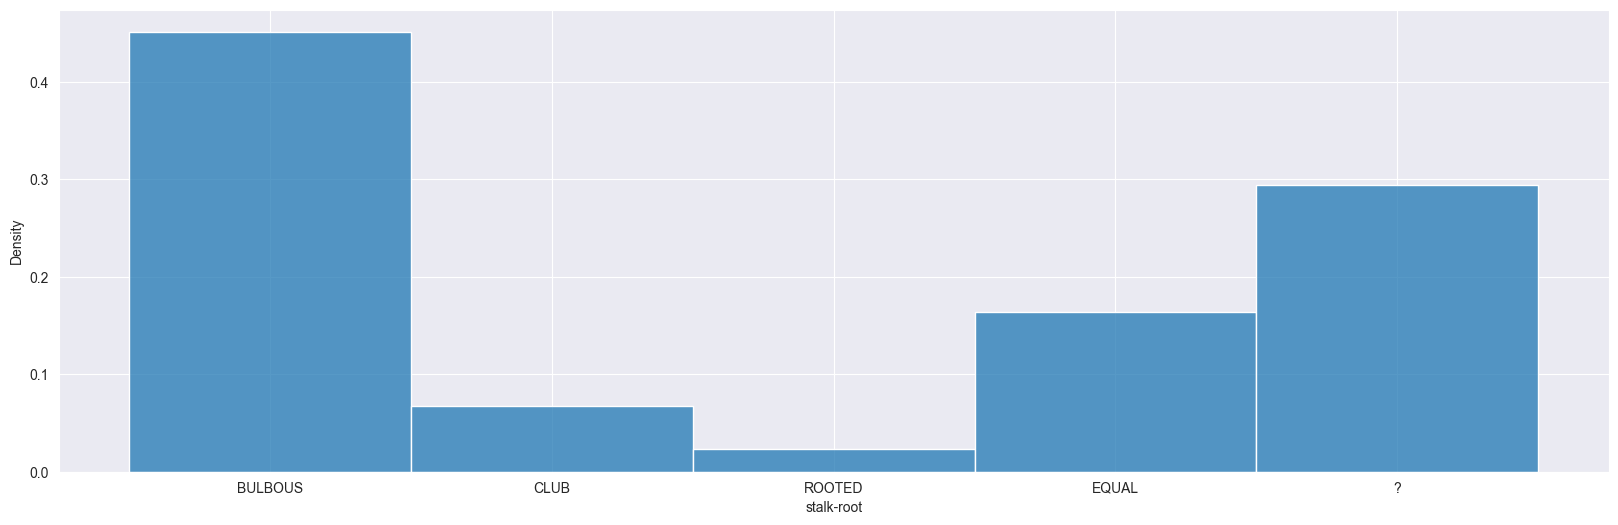

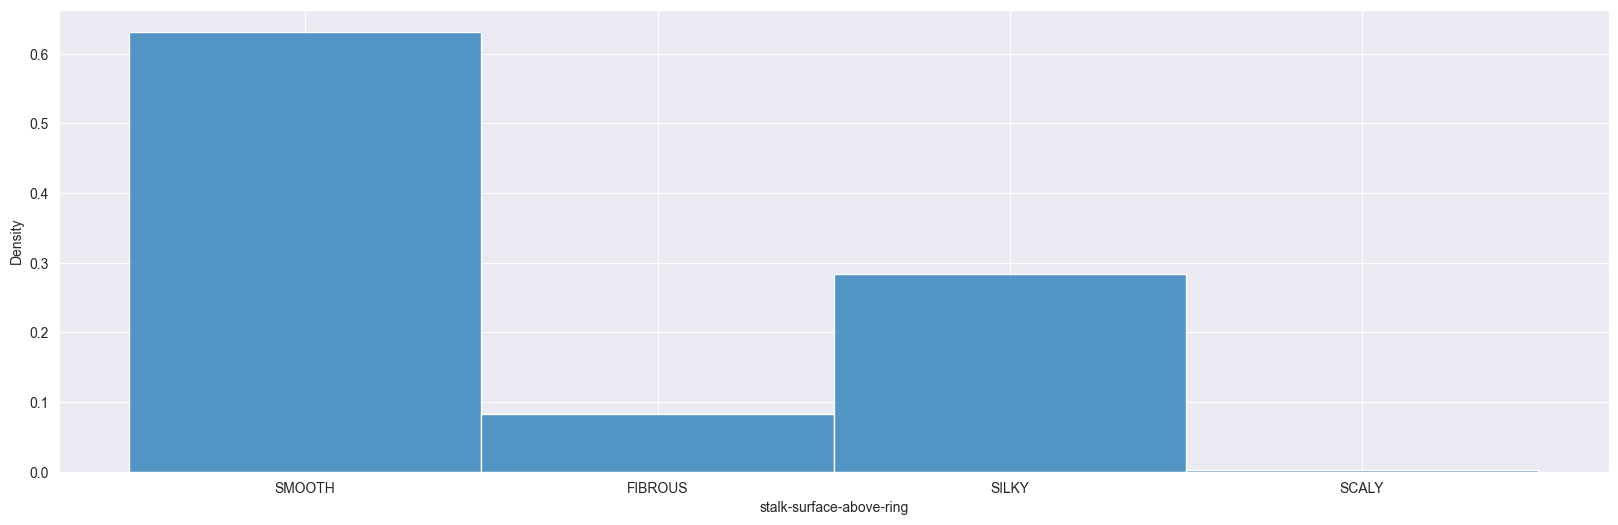

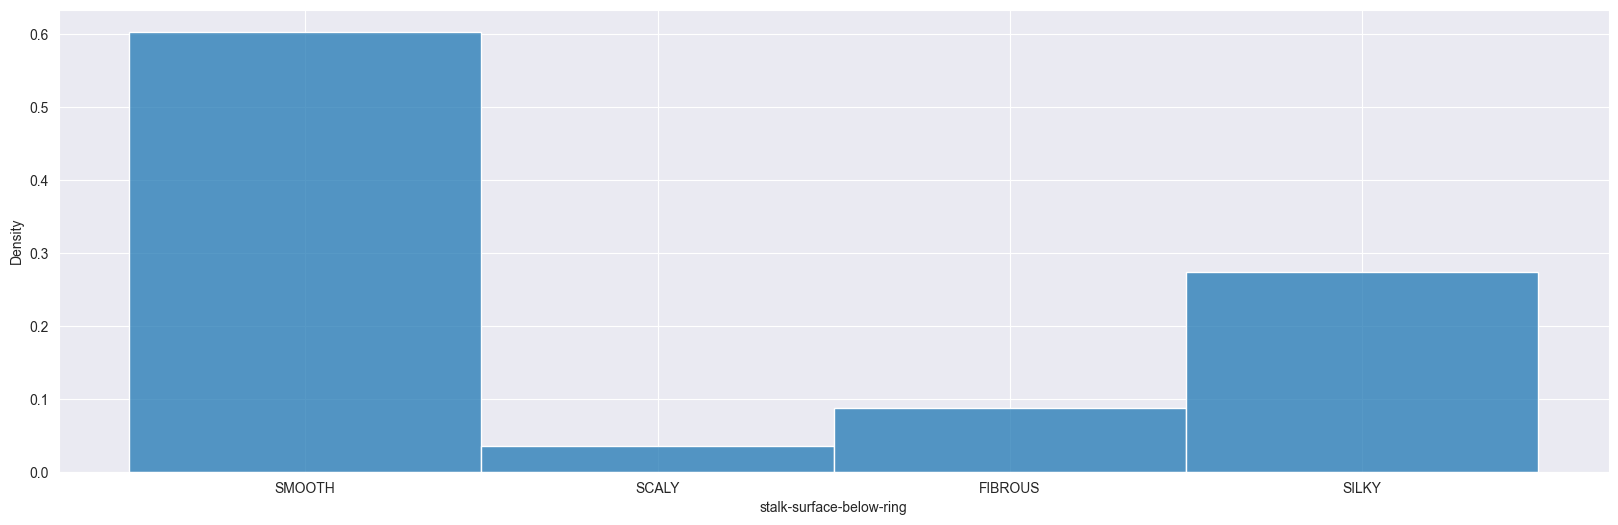

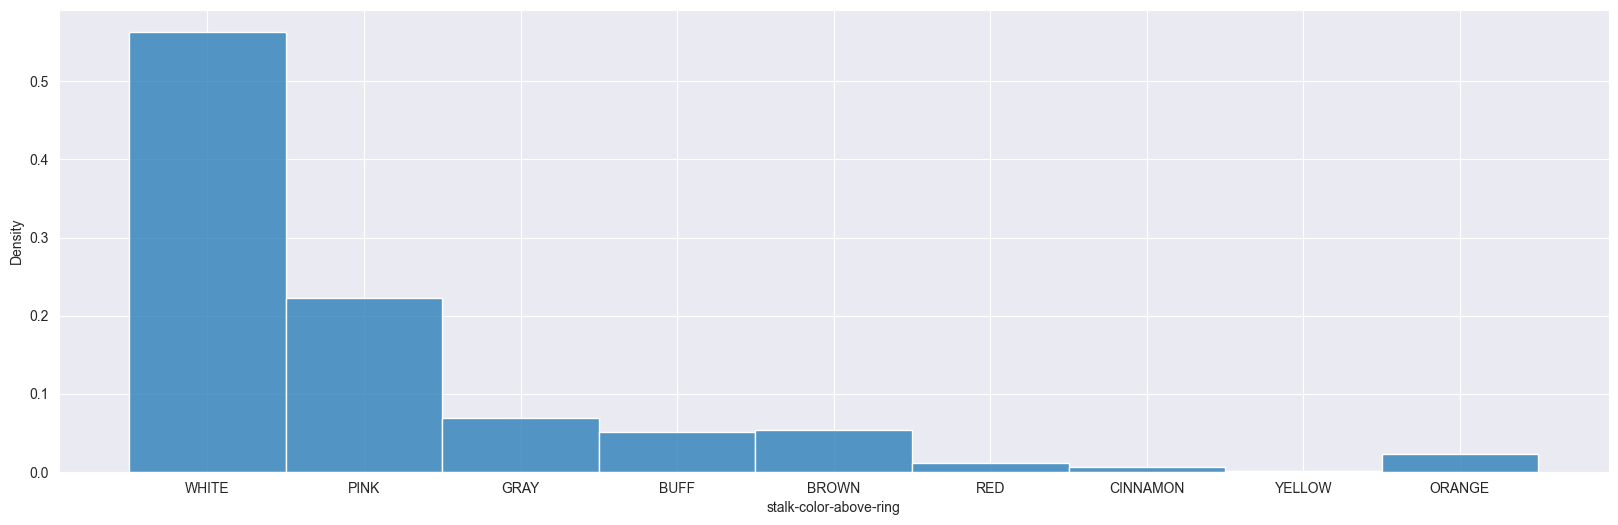

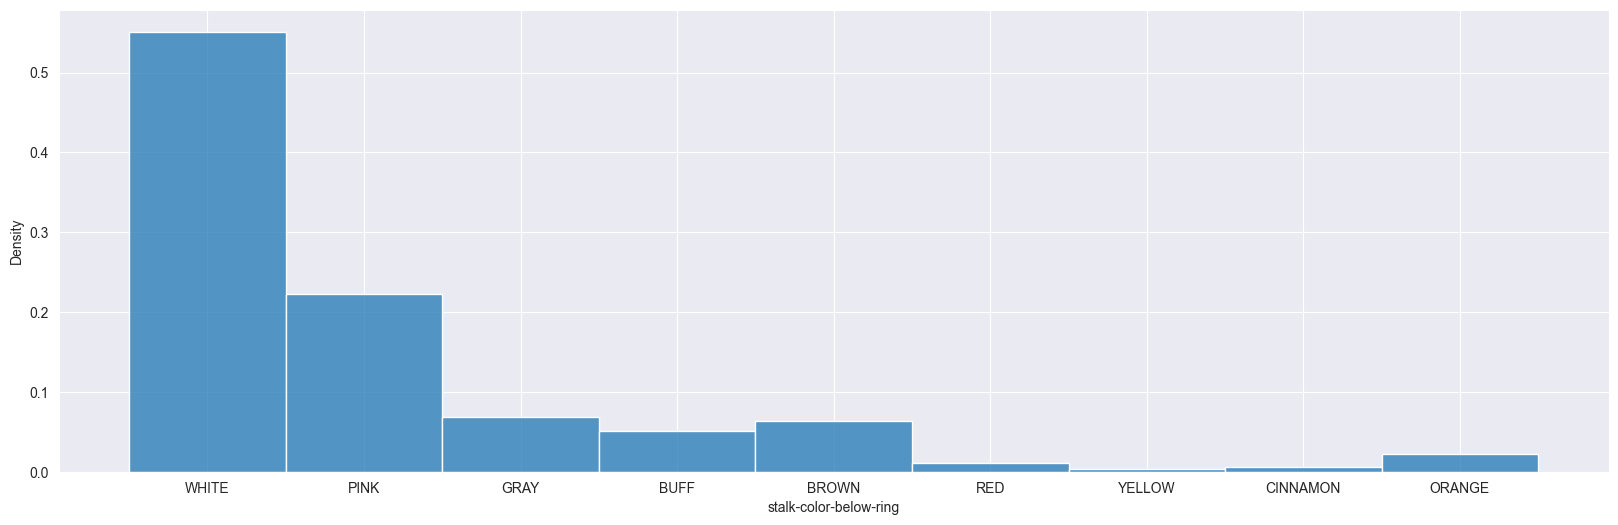

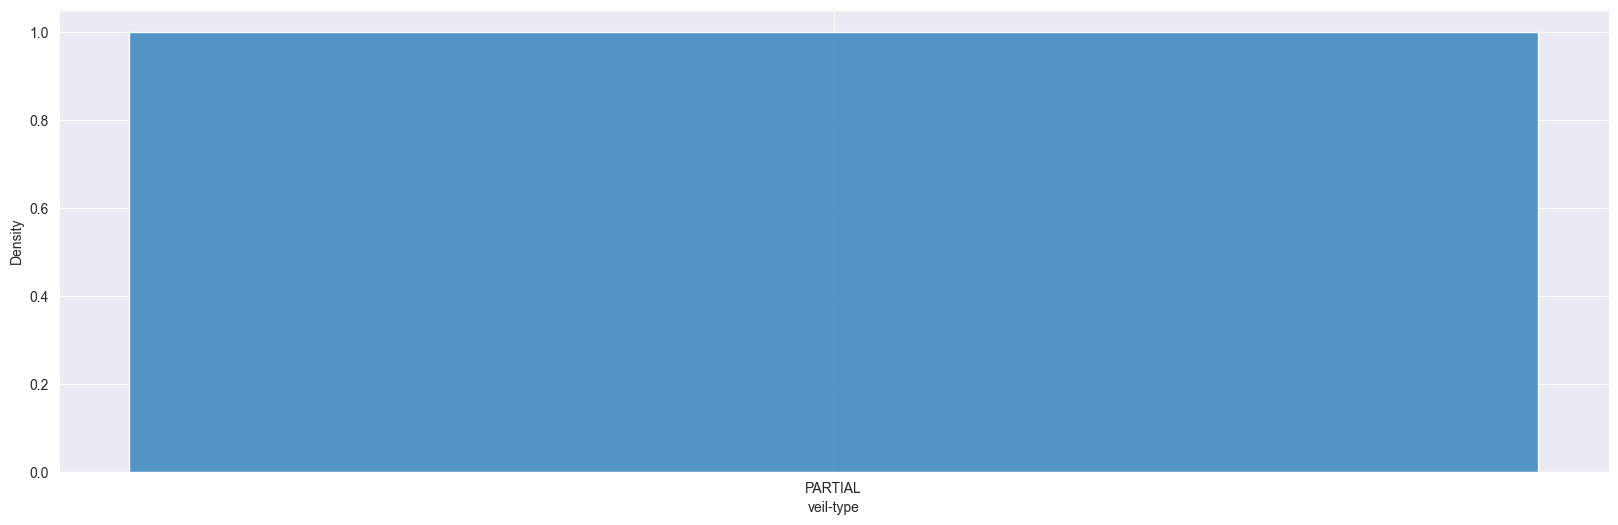

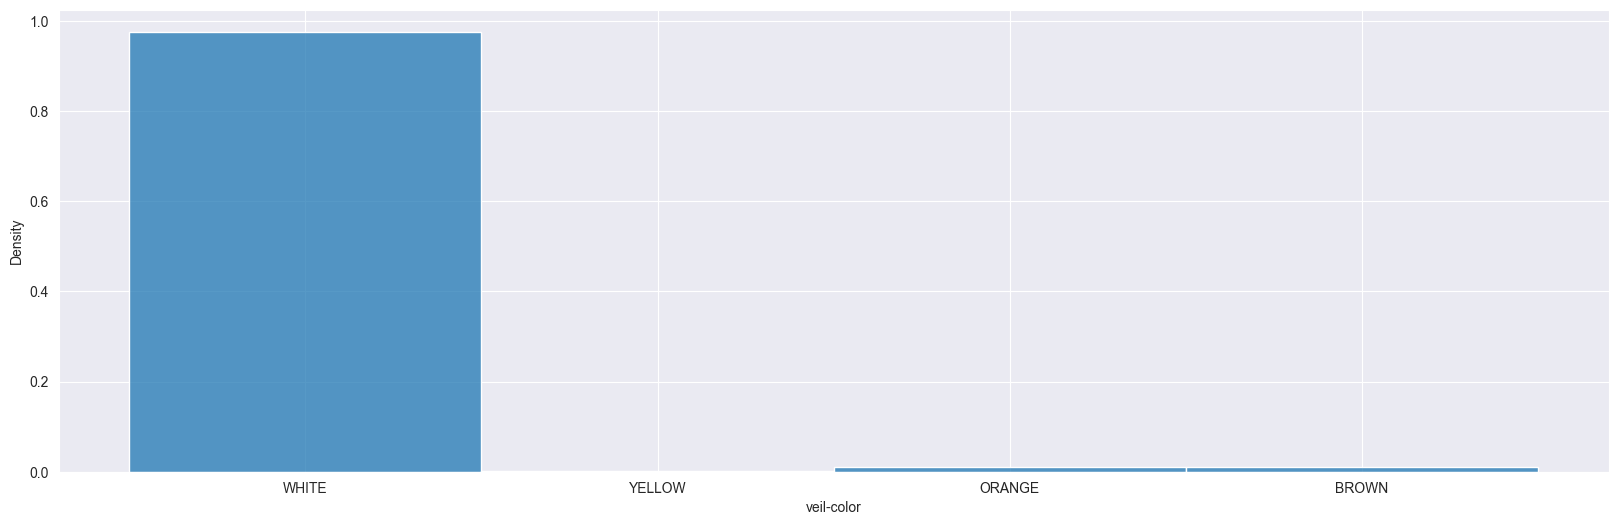

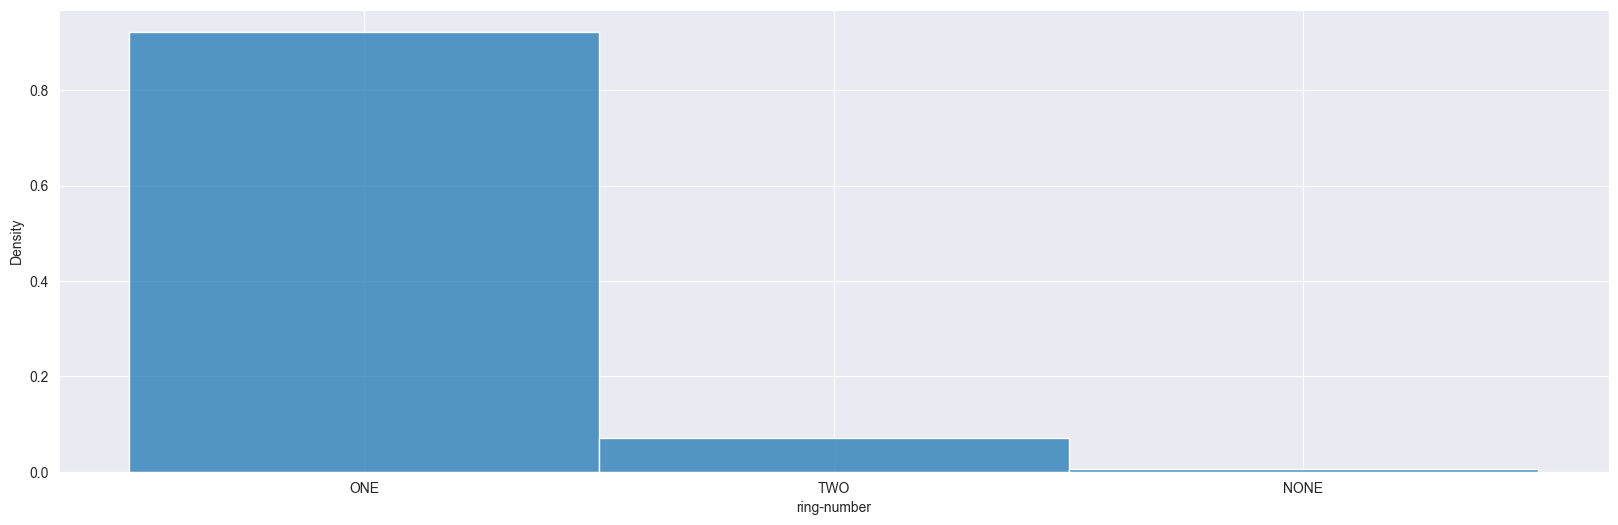

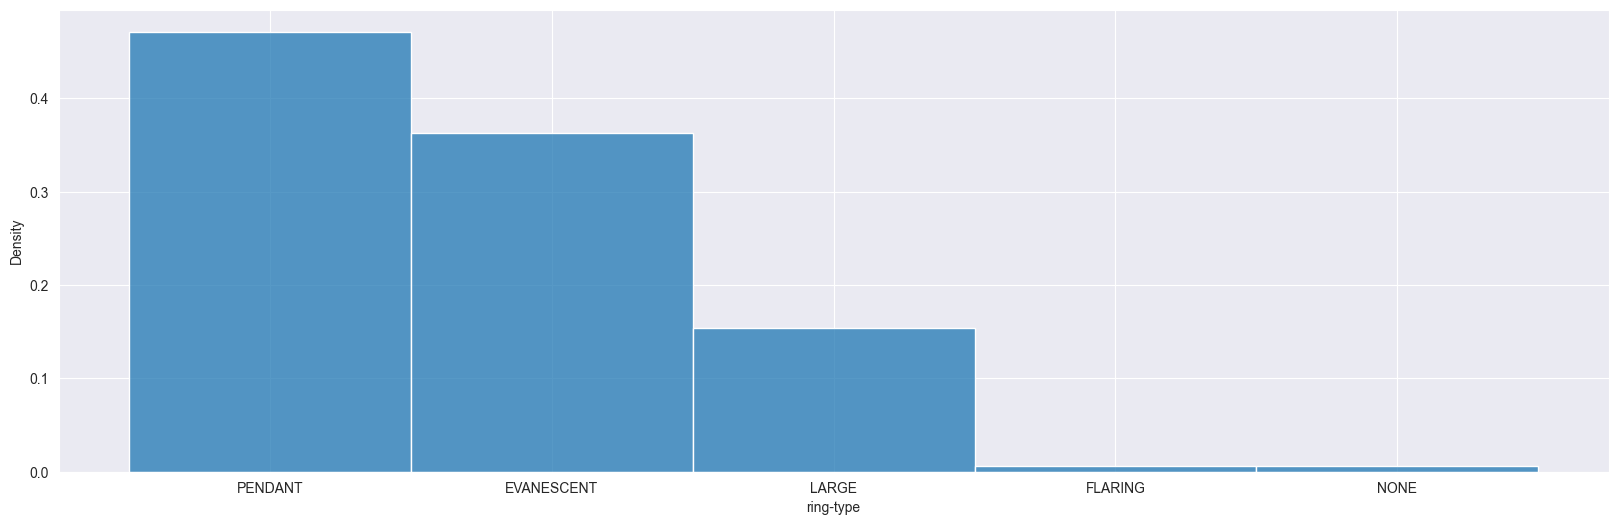

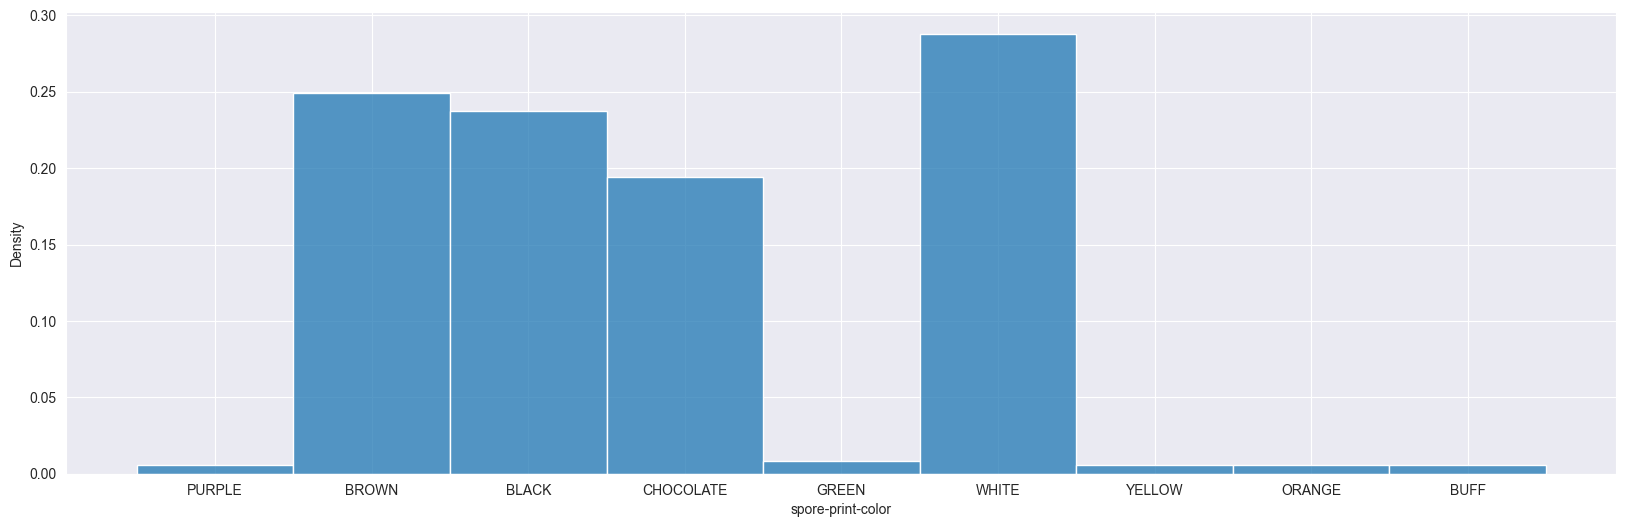

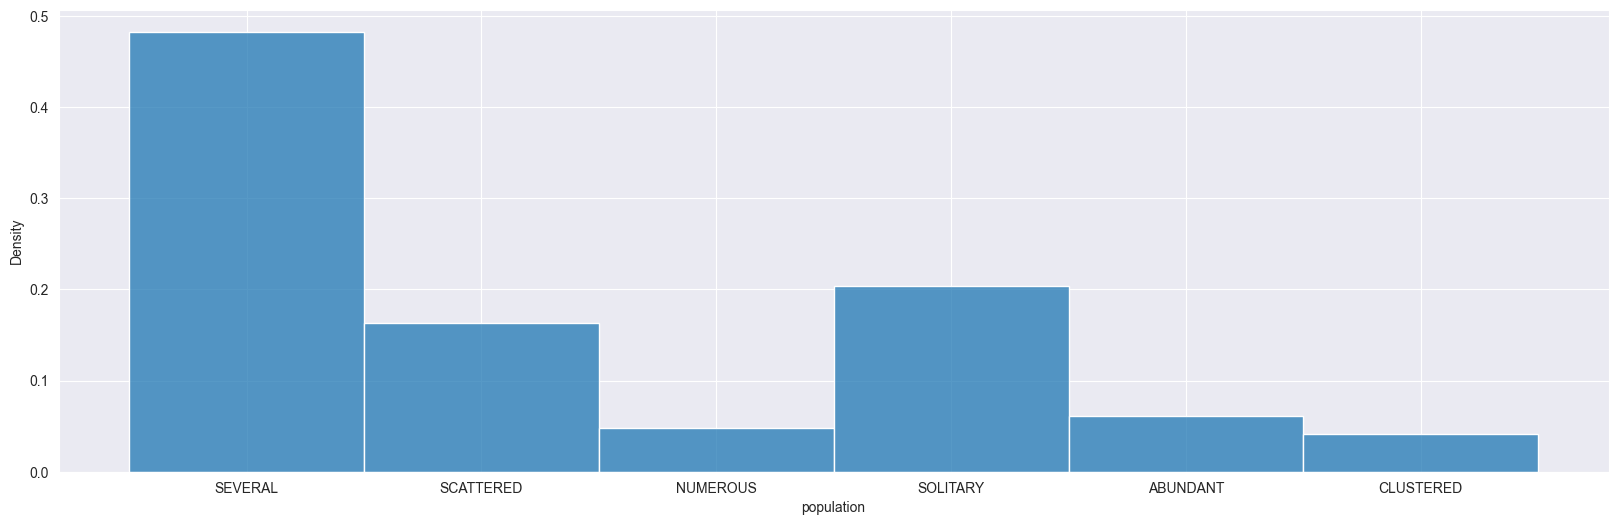

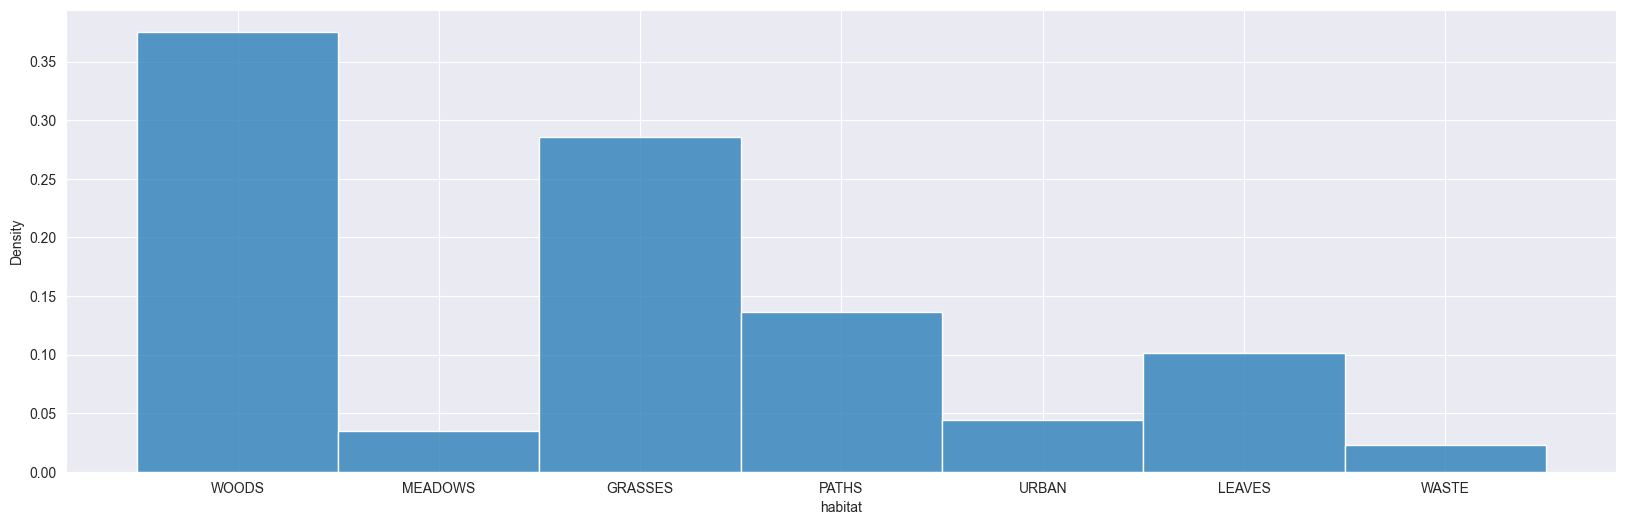

In [5]:
for i in dfm.columns:
    plt.figure(i)
    sns.histplot(dfm[i],stat="density")
    plt.show()

# Важность признаков

In [6]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [7]:
le = preprocessing.LabelEncoder()
for column_name in dfm.columns:
    dfm[column_name]=le.fit_transform(dfm[column_name])
Y=dfm.iloc[:, 0:1].values.ravel()
X=dfm.iloc[:, 1:23]

In [8]:
clf = RandomForestClassifier(criterion='entropy', random_state=0)
clf.fit(X, Y)

RandomForestClassifier(criterion='entropy', random_state=0)

<Axes: >

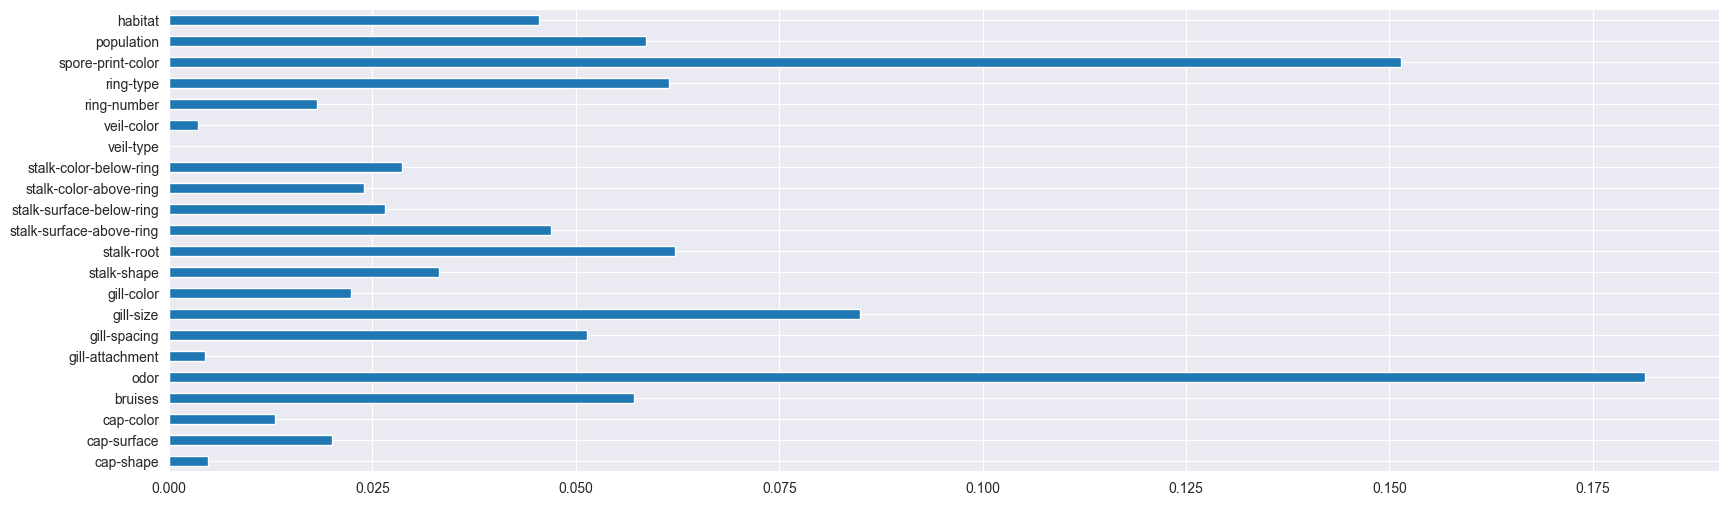

In [9]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

In [10]:
dfm = dfm.drop(['veil-type', 'veil-color', 'gill-attachment'], axis=1)

<Axes: >

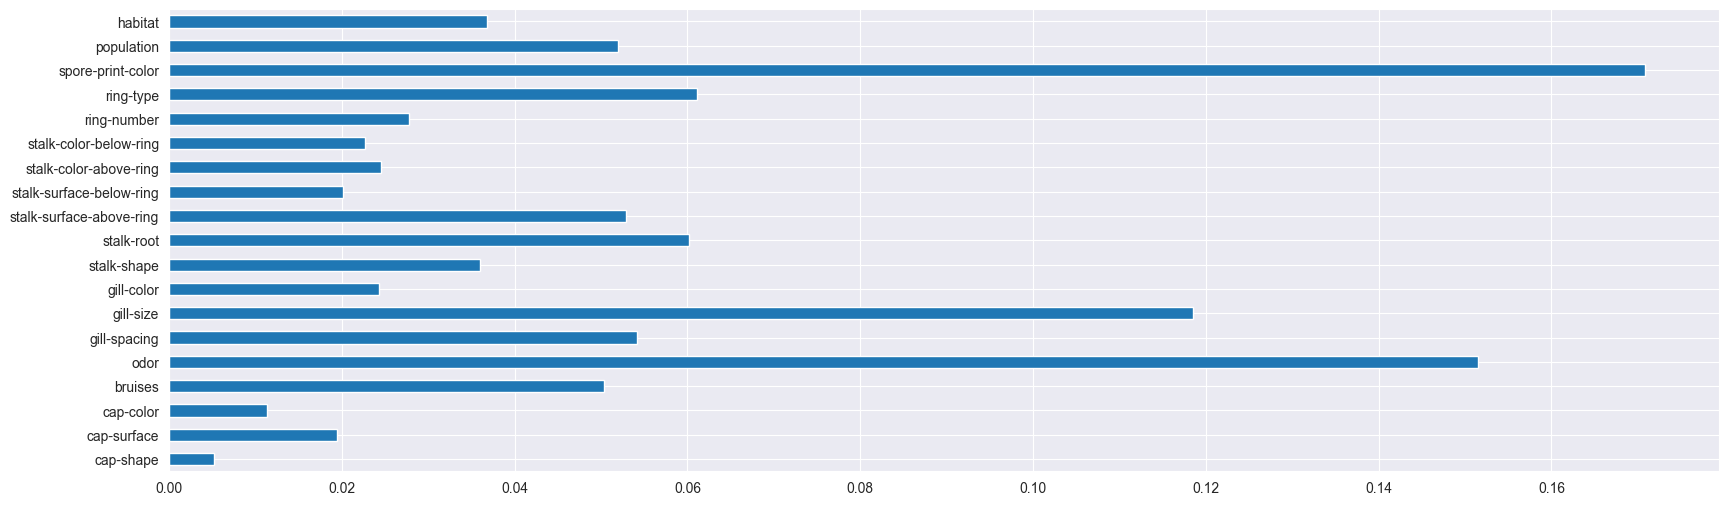

In [11]:
le = preprocessing.LabelEncoder()
for column_name in dfm.columns:
    dfm[column_name]=le.fit_transform(dfm[column_name])
Y=dfm.iloc[:, 0:1].values.ravel()
X=dfm.iloc[:, 1:20]
clf = RandomForestClassifier(criterion='entropy', random_state=0)
clf.fit(X, Y)
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

# Предобработка данных

In [12]:
data_encoded = pd.get_dummies(dfm)
print(data_encoded)

      class-label  cap-shape  cap-surface  cap-color  bruises  odor  \
0               0          2            3          8        0     0   
1               0          2            3          8        0     0   
2               0          2            3          8        0     0   
3               0          2            3          8        0     0   
4               0          2            3          8        0     0   
...           ...        ...          ...        ...      ...   ...   
8411            0          4            3          0        1     6   
8412            0          4            3          0        1     6   
8413            0          4            3          0        1     6   
8414            0          4            3          0        1     6   
8415            0          4            3          0        1     6   

      gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  \
0                1          1          10            1           1   
1      

In [13]:
# 1. Загрузка данных
mushrooms = data_encoded.copy()
X = mushrooms.drop('class-label', axis=1)
y = mushrooms['class-label']

In [14]:
# 2. Проверка данных
print(X.head())
print(y.value_counts())

# 3. Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Преобразование меток y в формат one-hot
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(pd.DataFrame(y))

# 5. Разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.3, random_state=42)

y_train_class = encoder.inverse_transform(y_train)
y_test_class = encoder.inverse_transform(y_test)


   cap-shape  cap-surface  cap-color  bruises  odor  gill-spacing  gill-size  \
0          2            3          8        0     0             1          1   
1          2            3          8        0     0             1          1   
2          2            3          8        0     0             1          1   
3          2            3          8        0     0             1          1   
4          2            3          8        0     0             1          1   

   gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  \
0          10            1           1                         3   
1          10            1           1                         3   
2           7            1           1                         3   
3           7            1           1                         3   
4           1            1           1                         3   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         3    

In [15]:
X_scaled

array([[-0.55416823,  1.0633796 ,  1.09763102, ...,  1.06202911,
         0.3225964 ,  1.1283009 ],
       [-0.55416823,  1.0633796 ,  1.09763102, ..., -0.70858044,
         0.3225964 ,  1.1283009 ],
       [-0.55416823,  1.0633796 ,  1.09763102, ...,  1.06202911,
         0.3225964 ,  1.1283009 ],
       ...,
       [ 1.68808168,  1.0633796 , -1.25321837, ...,  0.7079072 ,
        -1.96017098, -0.83104632],
       [ 1.68808168,  1.0633796 , -1.25321837, ..., -0.35445853,
         0.3225964 , -0.83104632],
       [ 1.68808168,  1.0633796 , -1.25321837, ..., -0.35445853,
        -1.96017098, -0.83104632]])

# Используем модель

In [29]:
net_arch_mushroom = (19, 25, 15, 2)
mlp_mushroom = MLP(net_arch_mushroom, fn=sig_f, is_need_f_final=True)

In [30]:
epochs = 150
loss_epoches, dW_epoches, loss_test_epoches = mlp_mushroom.train(X_train, y_train, epochs=epochs, lr=0.005, X_test=X_test, y_test=y_test)

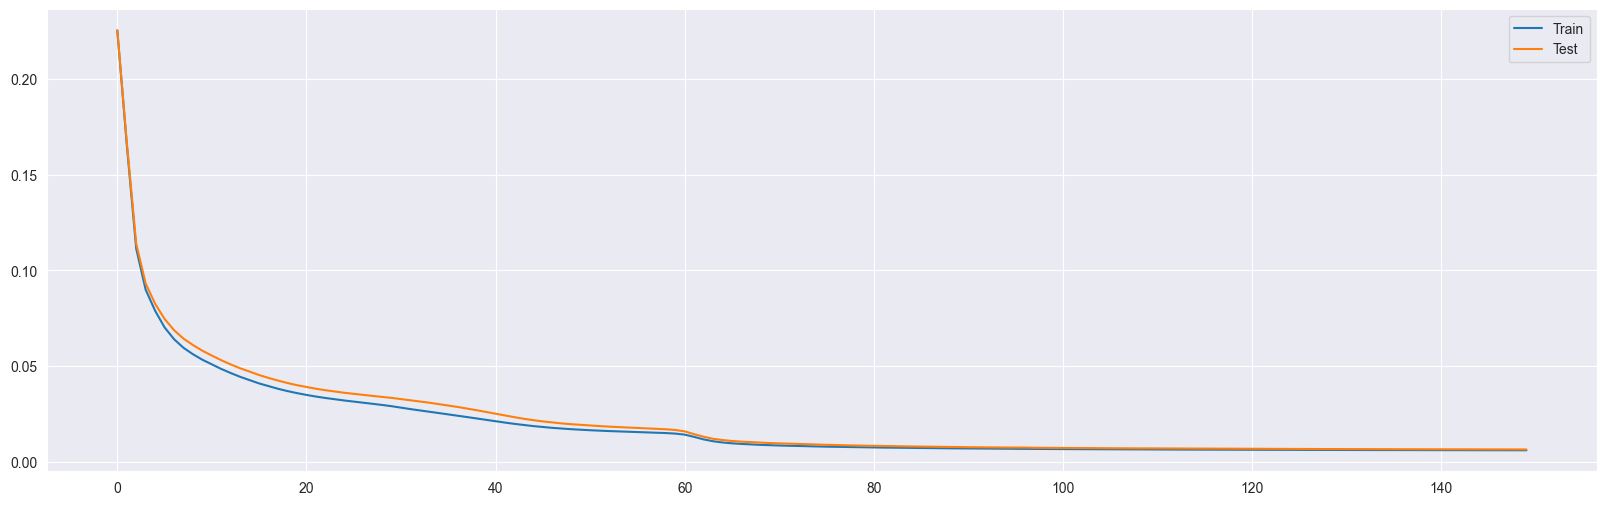

In [31]:
plt.plot(loss_epoches, label='Train')
plt.plot(loss_test_epoches, label='Test')
plt.legend(loc='upper right')
plt.show()

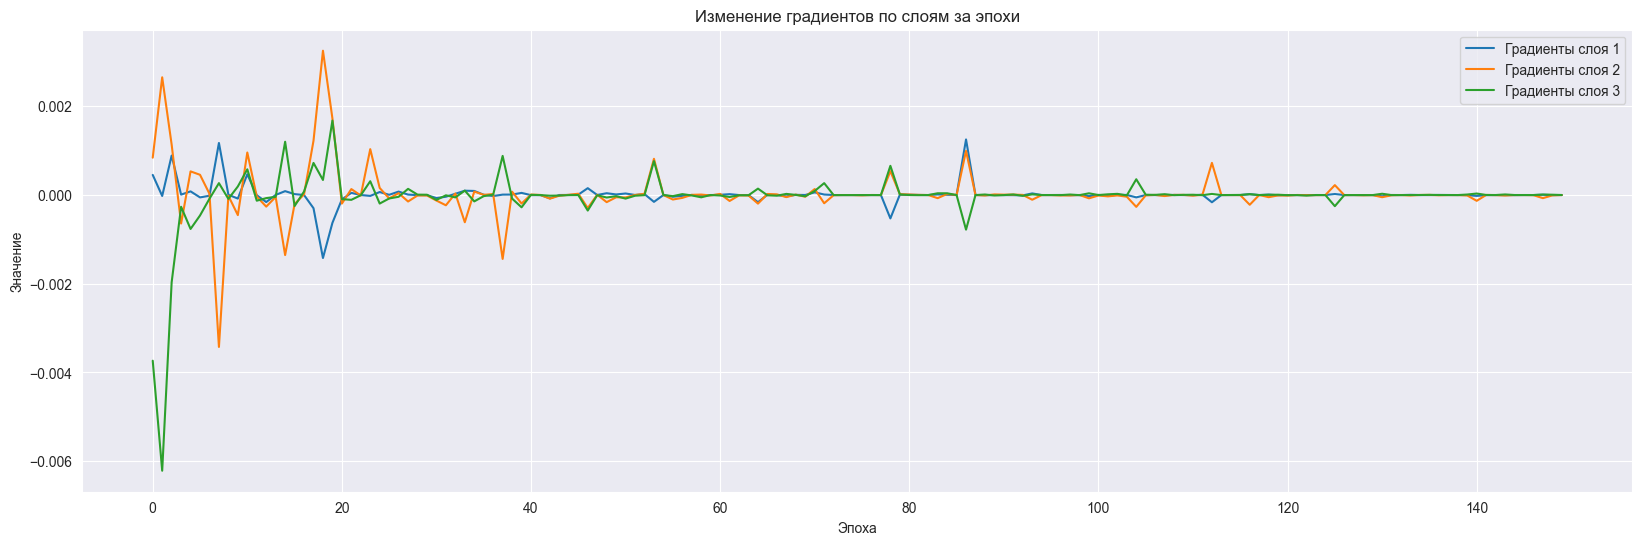

In [32]:
# Визуализация градиентов на одном графике
for layer in range(dW_epoches.shape[0]):
    plt.plot(range(epochs), dW_epoches[layer, :], label=f'Градиенты слоя {layer + 1}')

plt.title('Изменение градиентов по слоям за эпохи')
plt.xlabel('Эпоха')
plt.ylabel('Значение')
plt.legend(loc='upper right')  # Легенда для обозначения линий
plt.grid(True)  # Сетка для лучшего визуального восприятия
plt.show()

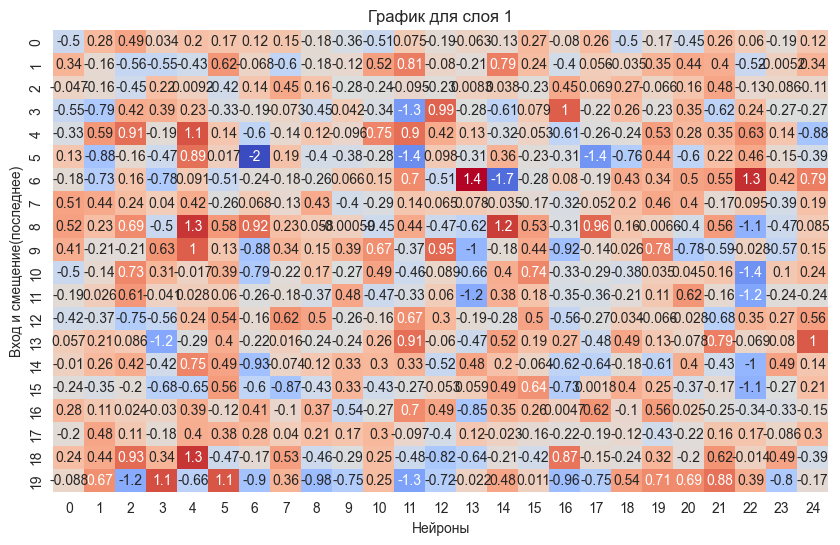

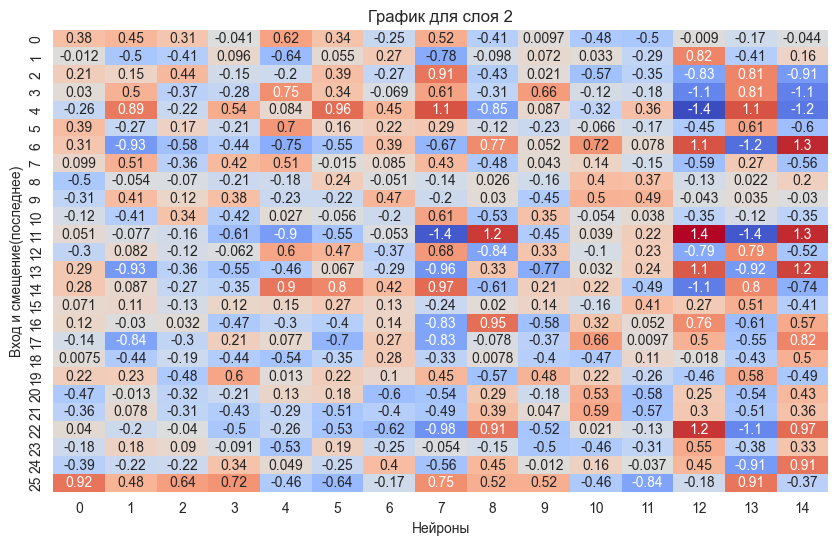

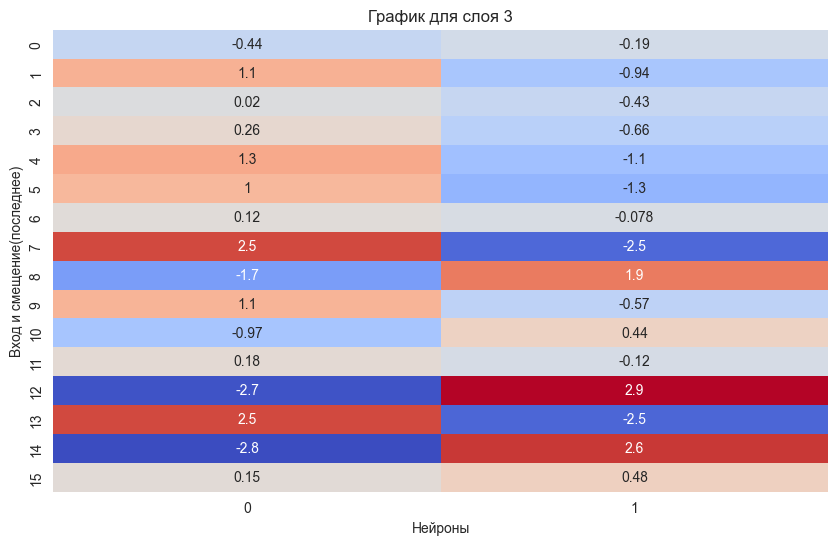

In [33]:
visualize_weights_with_biases(mlp_mushroom.W, mlp_mushroom.b)

In [34]:
res = mlp_mushroom.predict(X_test).T
print('Входящие данные\n',X_test, y_test)
print('Результат:\n',res)
print('Loss\n', mlp_mushroom.compute_loss(X_test, y_test))

Входящие данные
 [[ 5.66956726e-01  2.23533249e-01 -1.25321837e+00 ...  1.41615102e+00
   3.22596404e-01 -8.31046322e-01]
 [-5.54168228e-01  2.23533249e-01  1.39148719e+00 ... -3.36617785e-04
   3.22596404e-01 -1.22291577e+00]
 [-5.54168228e-01 -1.45615945e+00 -1.25321837e+00 ... -7.08580437e-01
   1.08351886e+00  1.12830090e+00]
 ...
 [ 1.68808168e+00  2.23533249e-01 -1.25321837e+00 ...  1.41615102e+00
   3.22596404e-01 -4.73074330e-02]
 [ 5.66956726e-01 -1.45615945e+00  8.03774846e-01 ... -7.08580437e-01
   1.08351886e+00  1.12830090e+00]
 [ 5.66956726e-01  1.06337960e+00 -1.25321837e+00 ...  1.41615102e+00
   3.22596404e-01 -4.73074330e-02]] [[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
Результат:
 [[2.36780959e-03 7.23578656e-03 9.98476494e-01 ... 5.59098433e-04
  9.96804633e-01 7.54632426e-04]
 [9.97599417e-01 9.92807263e-01 1.46078707e-03 ... 9.99382877e-01
  3.20349880e-03 9.99180095e-01]]
Loss
 0.006485993187671015


In [35]:
res_proba = mlp_mushroom.predict_proba(X_test, True)

In [36]:
res_proba

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [37]:
res_class = mlp_mushroom.predict(X_test, True)

In [38]:
res_class

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

# Расчет метрик

In [39]:
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [40]:
res_proba = mlp_mushroom.predict(X_test, True)
# evaluate_model(res_proba, encoder.inverse_transform(y_train))

In [41]:
metrics = Metrics(res_proba, y_test_class)
metrics.confusion_matrix

Class 0: Precision = 0.9889, Recall = 1.0000, F1-Score = 0.9944
Class 1: Precision = 1.0000, Recall = 0.9873, F1-Score = 0.9936


array([[1340.,    0.],
       [  15., 1170.]])

In [42]:
metrics.accuracy

0.994059405940594

## ROC-кривая

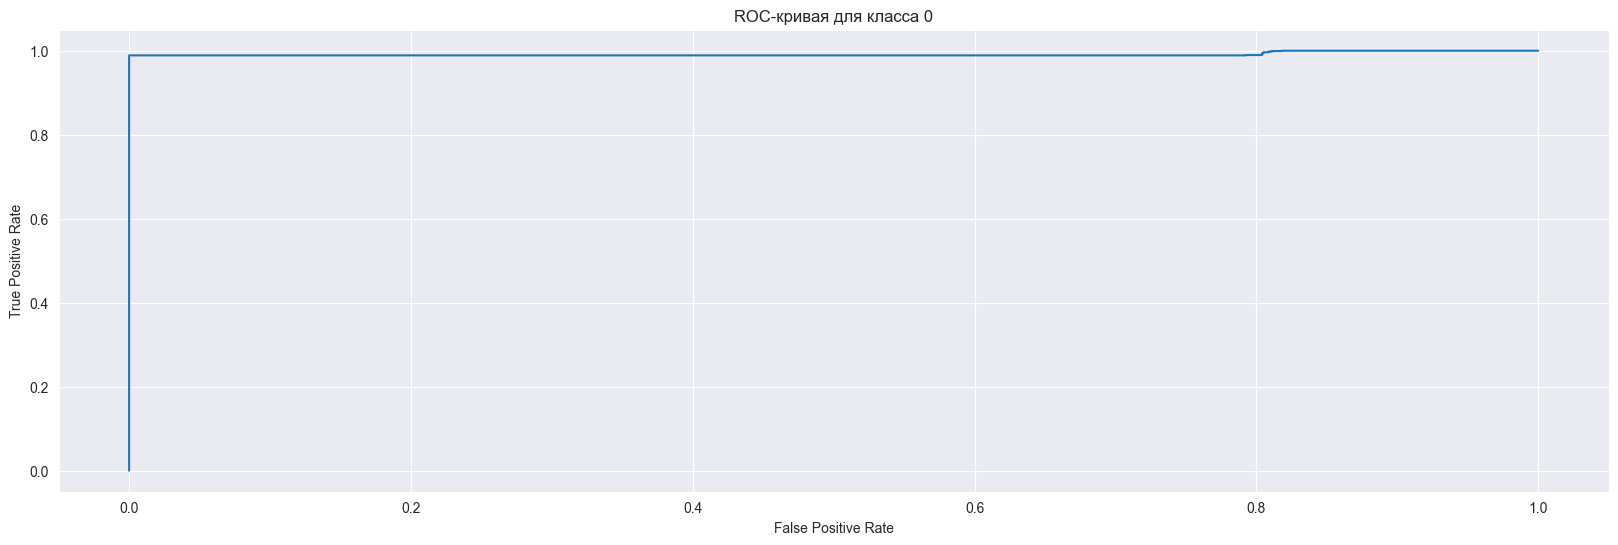

In [50]:
# ROC кривая для класса k
k = 0
y_pred_proba = mlp_mushroom.predict_proba(X_test, False)
fpr, tpr = roc_curve_manual(y_test_class, y_pred_proba, k)

# Построение ROC-кривой
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f"Class {k} ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC-кривая для класса {k}")
plt.show()

## Просто какие-то тесты

In [51]:
y_pred_proba_without_norm = mlp_mushroom.predict_proba(X_test, False)
y_pred_proba_without_norm

array([[2.36780959e-03, 9.97599417e-01],
       [7.23578656e-03, 9.92807263e-01],
       [9.98476494e-01, 1.46078707e-03],
       ...,
       [5.59098433e-04, 9.99382877e-01],
       [9.96804633e-01, 3.20349880e-03],
       [7.54632426e-04, 9.99180095e-01]])

In [52]:
res_proba2 = mlp_mushroom.predict(X_train, True)

In [53]:
metrics2 = Metrics(res_proba2, encoder.inverse_transform(y_train))
metrics2.confusion_matrix

Class 0: Precision = 0.9895, Recall = 1.0000, F1-Score = 0.9947
Class 1: Precision = 1.0000, Recall = 0.9882, F1-Score = 0.9941


array([[3100.,    0.],
       [  33., 2758.]])

In [54]:
metrics2.accuracy

0.9943982345951451